In [1]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
import time # speed of optimizers

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

Using TensorFlow backend.


In [2]:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [8]:
def nick_model_ReLU():
    model_ReLU = Sequential()
    model_ReLU.add(Dense(units=256, input_shape=(mnist_image_size,)))
    model_ReLU.add(LeakyReLU(alpha=.01))
    model_ReLU.add(Dense(units=128, input_shape=(mnist_image_size,)))
    model_ReLU.add(LeakyReLU(alpha=.01))
    model_ReLU.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU.add(LeakyReLU(alpha=.01))
    model_ReLU.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU.add(LeakyReLU(alpha=.01))
    model_ReLU.add(Dense(units=32, input_shape=(mnist_image_size,)))
    model_ReLU.add(LeakyReLU(alpha=.01))
    model_ReLU.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_ReLU



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



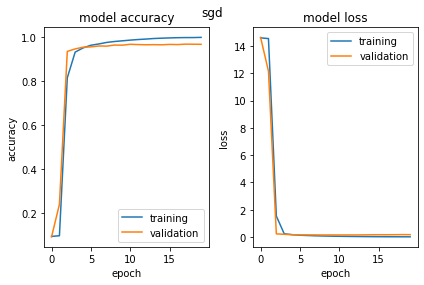

Trained in 75.80769908900001 seconds
Test loss: 0.177
Test accuracy: 0.964


In [9]:
name = "sgd"
model = nick_model_ReLU()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

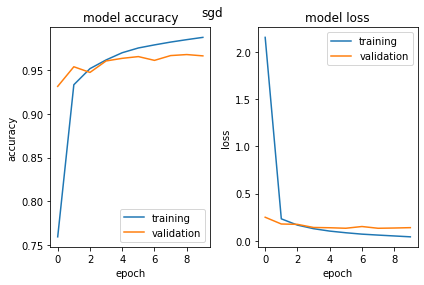

Trained in 38.644237472 seconds
Test loss: 0.151
Test accuracy: 0.962


In [11]:
name = "sgd"
model = nick_model_ReLU()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

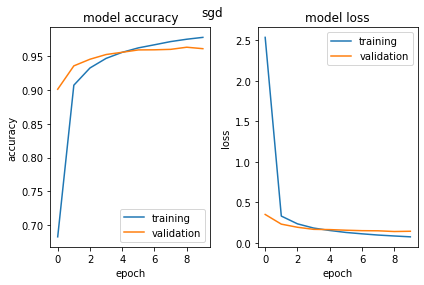

Trained in 28.43982678499998 seconds
Test loss: 0.172
Test accuracy: 0.954


In [13]:
name = "sgd"
model = nick_model_ReLU()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=256, epochs=10, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

In [7]:
def nick_model_ReLU_dropout():
    model_ReLU_drop = Sequential()
    model_ReLU_drop.add(Dense(units=256, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dense(units=128, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=32, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_ReLU_drop

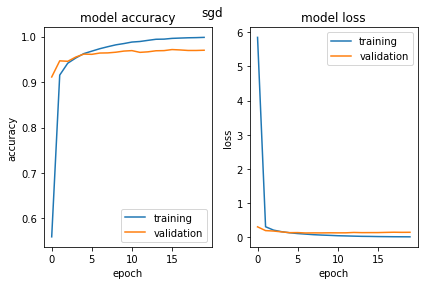

Trained in 77.022994796 seconds
Test loss: 0.19
Test accuracy: 0.964


In [9]:
name = "sgd"
model = nick_model_ReLU_dropout()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

In [16]:
def nick_model_ReLU_dropout():
    model_ReLU_drop = Sequential()
    model_ReLU_drop.add(Dense(units=256, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dense(units=128, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dropout(rate=0.5))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dropout(rate=0.15))
    model_ReLU_drop.add(Dense(units=32, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dropout(rate=0.2))
    model_ReLU_drop.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_ReLU_drop

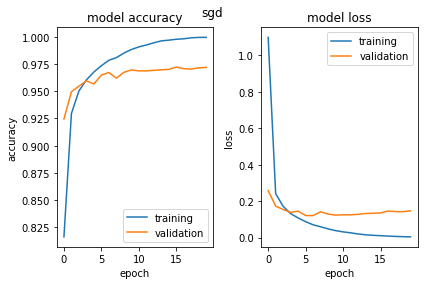

Trained in 77.20677279900002 seconds
Test loss: 0.174
Test accuracy: 0.966


In [17]:
name = "sgd"
model = nick_model_ReLU_dropout()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

In [18]:
def nick_model_ReLU_dropout():
    model_ReLU_drop = Sequential()
    model_ReLU_drop.add(Dense(units=256, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model_ReLU_drop.add(Dense(units=128, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.5))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.1))
    model_ReLU_drop.add(Dense(units=64, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.15))
    model_ReLU_drop.add(Dense(units=32, input_shape=(mnist_image_size,)))
    model_ReLU_drop.add(LeakyReLU(alpha=.01))
    model.add(Dropout(rate=0.25))
    model_ReLU_drop.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_ReLU_drop

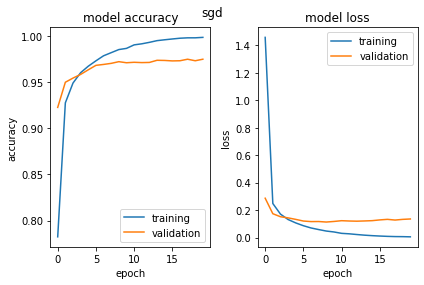

Trained in 78.37582753800007 seconds
Test loss: 0.2
Test accuracy: 0.964


In [19]:
name = "sgd"
model = nick_model_ReLU_dropout()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)